In [1]:
fileName1 = '1296BZn_PVP_OD0.6_70V_8Hz_19'
fileName2 = '1296BZn_PVP_OD0.6_70V_8Hz_18'
folder = '021317 QCSE type-II NR/'

In [2]:
from sys import platform
if platform.startswith('win'):
    prePath = 'G:/google drive/'
elif platform == 'darwin':
    prePath = '/Users/yungkuo/Google Drive/'

In [3]:
filePath = prePath + folder

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tff
import pandas as pd
import scipy.ndimage as ndi
from IPython.display import display

## Import movie 

In [5]:
tiffimg = tff.TiffFile(filePath+'raw data/'+fileName1+'.tif')
data = tiffimg.asarray().shape
movie_prism = tiffimg.asarray()
framerate = float(8.)*2
print('movie_prism size = {}'.format(data))

movie_prism size = (600, 512, 512)


In [6]:
tiffimg = tff.TiffFile(filePath+'raw data/'+fileName2+'.tif')
movie_dot = tiffimg.asarray()
print('movie_dot size = {}'.format(movie_dot.shape))

movie_dot size = (100, 512, 512)


In [7]:
spool = 1
if spool == 1:
    for n in range(data[0]):
        movie_prism[n,:,:] = movie_prism[n,:,:].T
    for n in range(movie_dot.shape[0]):
        movie_dot[n,:,:] = movie_dot[n,:,:].T

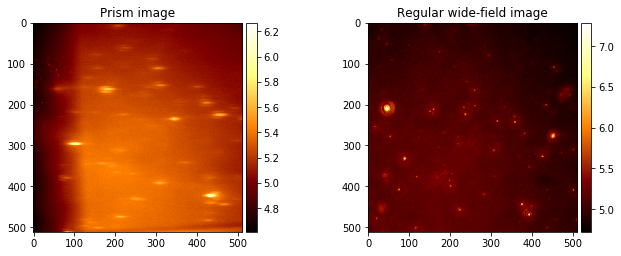

In [8]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
image = movie_prism.mean(0)
fig, ax = plt.subplots(1,2, figsize=(10,5))
im0 = ax[0].imshow(np.log(image), interpolation='None', cmap='afmhot')
im1 = ax[1].imshow(np.log(movie_dot.mean(0)), interpolation='None', cmap='afmhot')
ax[0].set_title('Prism image')
ax[1].set_title('Regular wide-field image')

divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im0, cax=cax)
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im1, cax=cax)
plt.subplots_adjust(wspace = 0.5) 

## Background correction using Gaussian filter

##### Exam image profile after filtering; Tune sigma

In [9]:
sigma = 30
movie_LPed = np.zeros(data)
for i in range(data[0]):
    movie_LPed[i,:,:] = ndi.gaussian_filter(movie_prism[i,:,:], sigma)
movie_HPed = movie_prism - movie_LPed

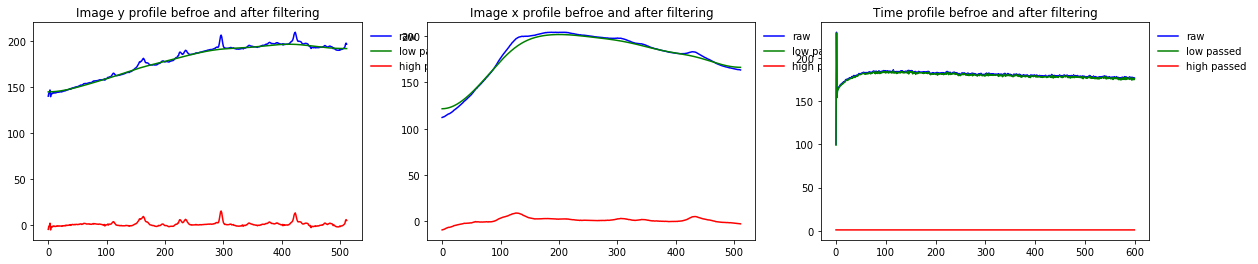

In [10]:
fig, ax = plt.subplots(1,3, figsize=(20,4))
ax[0].plot(movie_prism.mean(0).mean(1), 'b', label='raw')
ax[0].plot(movie_LPed.mean(0).mean(1), 'g', label='low passed')
ax[0].plot(movie_HPed.mean(0).mean(1), 'r', label='high passed')
ax[0].set_title('Image y profile befroe and after filtering')
ax[0].legend(frameon=False, bbox_to_anchor=(1,1))

ax[1].plot(movie_prism.mean(0).mean(0), 'b', label='raw')
ax[1].plot(movie_LPed.mean(0).mean(0), 'g', label='low passed')
ax[1].plot(movie_HPed.mean(0).mean(0), 'r', label='high passed')
ax[1].set_title('Image x profile befroe and after filtering')
ax[1].legend(frameon=False, bbox_to_anchor=(1,1))

ax[2].plot(movie_prism.mean(1).mean(1), 'b', label='raw')
ax[2].plot(movie_LPed.mean(1).mean(1), 'g', label='low passed')
ax[2].plot(movie_HPed.mean(1).mean(1), 'r', label='high passed')
ax[2].set_title('Time profile befroe and after filtering')
ax[2].legend(frameon=False, bbox_to_anchor=(1,1))

##### Prism Movie after filtering

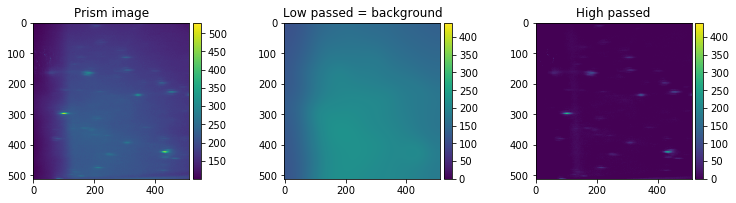

In [11]:
L = np.mean(movie_LPed, axis=0)
H = np.mean(movie_HPed, axis=0)
im = {}
fig, ax = plt.subplots(1,3, figsize=(12,4))
im['0'] = ax[0].imshow(image)
im['1'] = ax[1].imshow(L, vmin=0, vmax=440)
im['2'] = ax[2].imshow(H, vmin=0, vmax=440)
ax[0].set_title('Prism image')
ax[1].set_title('Low passed = background')
ax[2].set_title('High passed')

for i in range(3):
    divider = make_axes_locatable(ax[i])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im[str(i)], cax=cax)
plt.subplots_adjust(wspace = 0.5) 

In [12]:
sigma = 20
movie_dot_LPed = np.zeros(movie_dot.shape)
for i in range(movie_dot.shape[0]):
    movie_dot_LPed[i,:,:] = ndi.gaussian_filter(movie_dot[i,:,:], sigma)
movie_dot_HPed = movie_dot - movie_dot_LPed

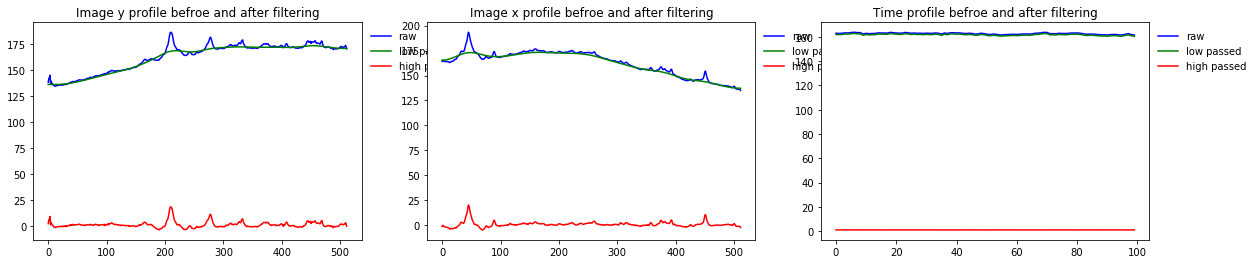

In [13]:
fig, ax = plt.subplots(1,3, figsize=(20,4))
ax[0].plot(movie_dot.mean(0).mean(1), 'b', label='raw')
ax[0].plot(movie_dot_LPed.mean(0).mean(1), 'g', label='low passed')
ax[0].plot(movie_dot_HPed.mean(0).mean(1), 'r', label='high passed')
ax[0].set_title('Image y profile befroe and after filtering')
ax[0].legend(frameon=False, bbox_to_anchor=(1,1))

ax[1].plot(movie_dot.mean(0).mean(0), 'b', label='raw')
ax[1].plot(movie_dot_LPed.mean(0).mean(0), 'g', label='low passed')
ax[1].plot(movie_dot_HPed.mean(0).mean(0), 'r', label='high passed')
ax[1].set_title('Image x profile befroe and after filtering')
ax[1].legend(frameon=False, bbox_to_anchor=(1,1))

ax[2].plot(movie_dot.mean(1).mean(1), 'b', label='raw')
ax[2].plot(movie_dot_LPed.mean(1).mean(1), 'g', label='low passed')
ax[2].plot(movie_dot_HPed.mean(1).mean(1), 'r', label='high passed')
ax[2].set_title('Time profile befroe and after filtering')
ax[2].legend(frameon=False, bbox_to_anchor=(1,1))

##### Dot movie after filtering

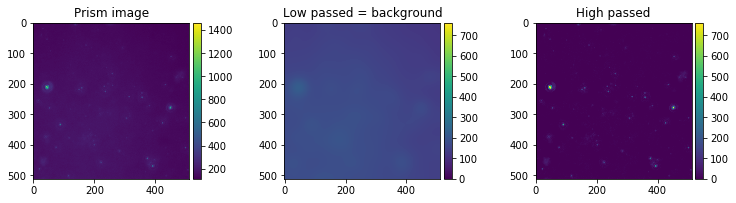

In [14]:
L = np.mean(movie_dot_LPed, axis=0)
H = np.mean(movie_dot_HPed, axis=0)
im = {}
fig, ax = plt.subplots(1,3, figsize=(12,4))
im['0'] = ax[0].imshow(movie_dot.mean(0))
im['1'] = ax[1].imshow(L, vmin=0, vmax=760)
im['2'] = ax[2].imshow(H, vmin=0, vmax=760)
ax[0].set_title('Prism image')
ax[1].set_title('Low passed = background')
ax[2].set_title('High passed')

for i in range(3):
    divider = make_axes_locatable(ax[i])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im[str(i)], cax=cax)
plt.subplots_adjust(wspace = 0.5) 

## Find dots' and lines' coordinates

In [15]:
import ROI

In [16]:
scan = [3,3]
pts_dot = ROI.finddot(movie_dot_HPed.mean(0), scan, nstd=1.4)
scan = [3,10]
pts_prism = ROI.finddot(movie_HPed.mean(0), scan, nstd=1.3)

In [17]:
print(pts_dot.shape, pts_prism.shape)

(26, 2) (28, 2)


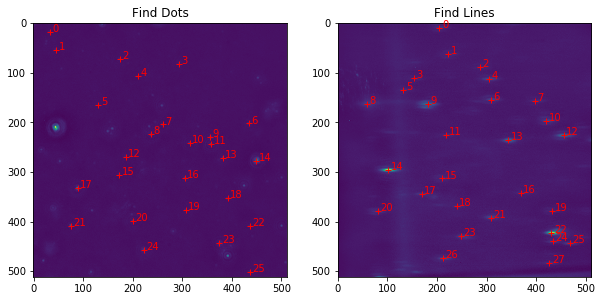

In [18]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].set_title('Find Dots')
for count, pt in enumerate(pts_dot):
    ax[0].plot(pt[0],pt[1], 'r+')
    ax[0].annotate(count, xy=pt+[5,0], color='r')
ax[0].imshow(movie_dot_HPed.mean(0), interpolation='None')
ax[1].set_title('Find Lines')
for count, pt in enumerate(pts_prism):
    ax[1].plot(pt[0],pt[1], 'r+')
    ax[1].annotate(count, xy=pt+[5,0], color='r')
ax[1].imshow(movie_HPed.mean(0), interpolation='None')

### ROI after background subtraction

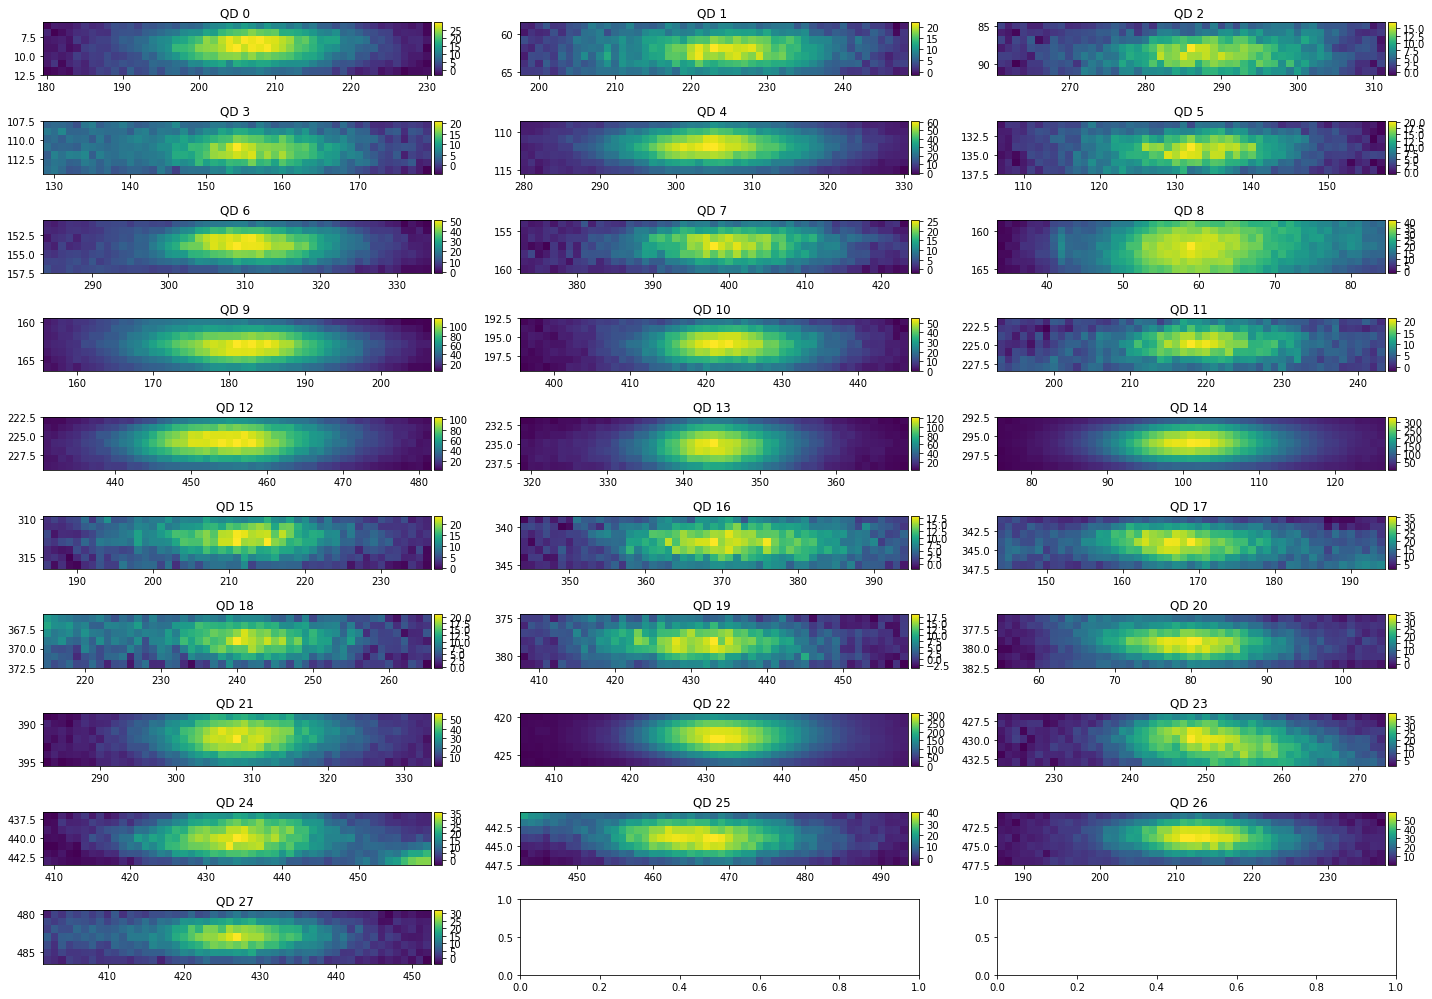

In [19]:
scan = [scan[0],scan[1]+15]
import math
fig, ax = plt.subplots(int(math.ceil(float(len(pts_prism))/3)), 3, figsize=(20,math.ceil(float(len(pts_prism))/2)))
ax = ax.ravel()
for count, pt in enumerate(pts_prism):    
    roi = ROI.get_roi_square(pt, scan)
    
    extent = (roi[1].start-0.5, np.min([roi[1].stop-0.5, 512]), np.min([roi[0].stop-0.5, 512]), roi[0].start-0.5)
    
    im = ax[count].imshow(movie_HPed.mean(0)[roi], interpolation='none', extent=extent)
    ax[count].set_title('QD {} '.format(count))
    divider = make_axes_locatable(ax[count])
    cax = divider.append_axes("right", size="2%", pad=0.05)
    fig.colorbar(im, cax=cax)  
fig.tight_layout()
#plt.subplots_adjust(hspace = 0.6) 

### Time traces after background correction

In [20]:
show_tt = 0 #Choose to show time trace or not

In [21]:
if show_tt == 1:
    T = np.arange(0,data[0]/framerate, 1/framerate)
    frame_start = 2
    for count, pt in enumerate(pts_prism):
        fig, ax = plt.subplots(2,1, figsize=(18,3))
        ax[0].plot(T[frame_start:], ROI.get_timetrace(movie_prism, pt, scan)[frame_start:], 'b', label='raw')
        ax[0].plot(T[frame_start:], ROI.get_timetrace(movie_LPed, pt, scan)[frame_start:], 'g', label='low passed')
        ax[1].plot(T[frame_start:], ROI.get_timetrace(movie_HPed, pt, scan)[frame_start:], 'r', label='high passed')
        ax[1].set_xlabel('Time (s)')
        ax[0].set_ylabel('Intensity')
        ax[1].set_ylabel('Intensity')
        ax[0].set_title('Time traces of QD{}'.format(count))
        ax[0].legend(bbox_to_anchor=(0., 1.01, 1., .101), loc=3,
                   ncol=2, borderaxespad=0., frameon=False)
        ax[1].legend(bbox_to_anchor=(0., 1.01, 1., .101), loc=3,
                   ncol=2, borderaxespad=0., frameon=False)
        plt.subplots_adjust(hspace = 0.5)
        plt.close(fig)
        display(fig)

## Calibrate wavelength

##### Find dx and dy

In [22]:
x_shift, y_shift, mag = (30 ,-60.918637535924951, 0.90703524833602123)
dot = (pts_dot+[x_shift,y_shift])/[1,mag]

    Dot  Prism    weighted dr
0     2      0    6477.680878
1     4      1   80939.706891
2     5      2  587817.194931
3     5      3    9225.245184
4     5      4  191347.029978
5     5      5  239195.295438
6     7      6   11687.252690
7     6      7   40534.037789
8     7      8  495725.266218
9     7      9  126151.517909
10   11     10   23863.551224
11   12     11   12181.377778
12   13     12   37116.710678
13   13     13   48784.887155
14   17     14    8047.218450
15   17     15  201044.573313
16   19     16   27272.589317
17   19     17  261135.108408
18   20     18    9435.434454
19   22     19   30517.283351
20   21     20   13973.330428
21   22     21  267140.217159
22   23     22    6352.537488
23   24     23   28088.323716
24   23     24  202391.583953
25   23     25  328821.006650
26   25     26  658856.731813
27   25     27   16677.305147


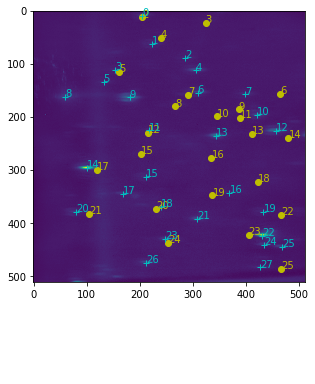

In [23]:
fig, ax = plt.subplots(figsize=(5,5))
for count, pt in enumerate(dot):
    ax.plot(pt[0], pt[1], 'yo')
    ax.annotate(count, xy=pt, color='y')
for count, pt in enumerate(pts_prism):
    ax.plot(pt[0], pt[1], 'c+')
    ax.annotate(count, xy=pt, color='c')
ax.imshow(movie_HPed.mean(0))

Match = pd.DataFrame()
for count, pt in enumerate(pts_prism):
    dot_index = np.argmin(np.sum(((dot-pt)*scan)**2, axis=1))
    DF1 = pd.DataFrame({'Dot':dot_index, 
                        'Prism':count, 
                        'weighted dr':np.amin(np.sum(((dot-pt)*scan)**2, axis=1))}, 
                       index=[count])
    Match = Match.append(DF1)
print(Match)

##### Extract wavelength

In [24]:
w = {}
#w_ex = {}
for i in Match.index:
    if Match['weighted dr'][i] < 5*10**4:
        dx, dy = pts_prism[Match['Prism'][i]]-pts_dot[Match['Dot'][i]]
        #print(i, pts_dot[Match['Dot'][i]][0], dx, scan, 'x')
        wavelength_fromX = ROI.get_wavelength(pts_dot[Match['Dot'][i]][0], dx, scan, 'x')
        #wavelength_withEx = ROI.get_wavelength_extrapolate_fill_nans(pts_dot[Match['Dot'][i]][0], dx, scan, 'x')
        w[i] = wavelength_fromX
        #w_ex[i] = wavelength_withEx

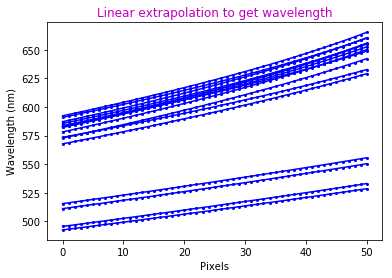

In [25]:
for i in w:
    #plt.plot(w_ex[i], 'm')
    plt.plot(w[i], 'bo-', ms=2)
plt.title('Linear extrapolation to get wavelength', color='m')
plt.xlabel('Pixels')
plt.ylabel('Wavelength (nm)')

In [26]:
def get_peak_FWHM(movie, pt, pad, x):
    roi = ROI.get_roi_square_3d(pt, pad)
    #tt = get_timetrace(movie, pt, pad)
    movie = movie[roi]
    spec_series = movie.mean(1)
    PDF = spec_series/np.repeat(np.sum(spec_series, axis=1), pad[1]*2+1).reshape(movie.shape[0], pad[1]*2+1)
    
    peaks = np.sum(spec_series*x, axis=1)/np.sum(spec_series, axis=1)
    #peaks_PDF = np.sum(PDF*x, axis=1)
    
    x600 = np.tile(x, movie.shape[0]).reshape(movie.shape[0], pad[1]*2+1)
    peaks600 = np.repeat(peaks, pad[1]*2+1).reshape(movie.shape[0], pad[1]*2+1)
    
    sigma2 = np.sum((spec_series*(x600-peaks600)**2), axis=1)/np.sum(spec_series, axis=1)
    FWHM = np.sqrt(sigma2) * 2 * np.sqrt(2*np.log(2))
    #sigma2_PDF = np.sum(PDF*(x600-peaks600)**2, axis=1)
    #FWHM_PDF = np.sqrt(sigma2_PDF) * 2 * np.sqrt(2*np.log(2))
    return FWHM

In [50]:
import urllib.request
link = urllib.request.urlopen('https://www.semrock.com/_ProductData/Spectra/FF605-Di02_Spectrum.TXT')
DCLP = np.genfromtxt(link, dtype='float', skip_header=4, skip_footer=1, usecols=None)

In [51]:
def get_r(movie, pt, pad, x, DCLP):
    DCLP_interp = np.interp(x, DCLP[:,0], DCLP[:,1])
    
    roi = ROI.get_roi_square_3d(pt, pad)
    #tt = get_timetrace(movie, pt, pad)
    movie = movie[roi]
    spec_series = movie.mean(1)
    
    T = np.sum(spec_series * DCLP_interp, axis=1)
    R = np.sum(spec_series * (1-DCLP_interp), axis=1)
    r = T/R
    return r

## Extract F trace, $\lambda$ trace

In [52]:
dLtt = pd.DataFrame(index=[np.arange(data[0])])
for count, pt in enumerate(pts_prism):
    if Match['weighted dr'][count] < 5*10**4 and np.isnan(w[count]).any() == False:
        if np.logical_and(pt[0]+scan[1]<512, pt[0]-scan[1]>0) and np.logical_and(pt[1]+scan[0]<512, pt[1]-scan[0]>0):
            tt = ROI.get_timetrace(movie_HPed, pt, scan)
            P = ROI.get_peak_ccms(movie_HPed, pt, scan, w[count])
            FWHM = get_peak_FWHM(movie_HPed, pt, scan, w[count])
            r = get_r(movie_HPed, pt, scan, w[count], DCLP)
            #P = np.clip(P, 460, 800)
            dLtt['%d_tt' % count] = tt
            dLtt['%d_P' % count] = P
            dLtt['%d_FWHM' % count] = FWHM
            dLtt['%d_r' % count] = r

C:\Users\NewQCSE\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: RuntimeWarning: invalid value encountered in sqrt


In [53]:
dLtt.to_csv(filePath+'results/tt/csv/'+fileName1+'_tt.csv')
dLtt[:5]
#dL.to_pickle(filePath+'results/'+fileName1+'_result.pkl')

,0_tt,0_P,0_FWHM,0_r,3_tt,3_P,3_FWHM,3_r,6_tt,6_P,...,22_FWHM,22_r,23_tt,23_P,23_FWHM,23_r,27_tt,27_P,27_FWHM,27_r
0,1.000000,616.221410,49.315544,1.736467,1.025210,616.571422,50.050443,1.766156,1.025210,618.052754,...,40.728285,0.642903,1.014006,596.575980,42.155262,0.539467,1.064426,530.866800,27.161209,0.004471
1,-2.568627,583.137515,NaN,-0.138616,3.047619,587.322514,NaN,0.277425,-5.487395,637.550416,...,22.703226,0.654937,62.938375,596.571709,36.173603,0.446800,11.882353,528.344908,NaN,0.002436
2,0.061625,1346.921621,NaN,-1.047390,8.557423,615.403582,38.050734,2.464913,7.537815,620.357699,...,22.528830,1.306993,12.882353,592.385829,31.500855,0.259878,-1.949580,544.095161,NaN,0.005973
3,-0.677871,572.888318,NaN,-0.386200,8.260504,613.117340,29.199570,2.516853,24.378151,616.217040,...,21.384200,0.617069,46.078431,604.133678,31.395830,1.057789,20.268908,532.755774,10.956893,0.004095
4,5.529412,616.629977,23.669880,9.744624,12.011204,615.232030,36.151201,2.964701,13.697479,612.611509,...,22.277064,1.907132,7.067227,594.242714,36.184897,0.461855,2.949580,534.377723,12.408134,0.002799
